In [1]:
from IPython.display import SVG

# The Outliers Removal Algorithm

Outliers present in the spatial data may affect the performance of the interpolation results, especially in the case when outlier value is extremely high. The example of interpolation with and without outliers is presented in:

```
Amri, N. A., Jemain, A. A., and Wan Hassan, W. F., “Kriging on comparison of Original and Outlier-free data”, in <i>The 2014 UKM FST Postgraduate Colloquium</i>, 2014, vol. 1614, no. 1, pp. 929–935. doi:10.1063/1.4895326.
```

And we can read that the prediction error of the outlier-removed model is 6% lower than the prediction error of the model with outliers in a dataset.

We are able to remove outliers at the preprocessing stage directly from the point observations. The `pyinterpolate` approach is different. Package allows to remove outliers from the *variogram point cloud*. We assume that the largest variances between the point pairs are those which are needed to be filtered out rather than single observations.

### `remove_outliers()` method for the semi-supervised cleaning of the variogram point cloud

#### Flow Diagram

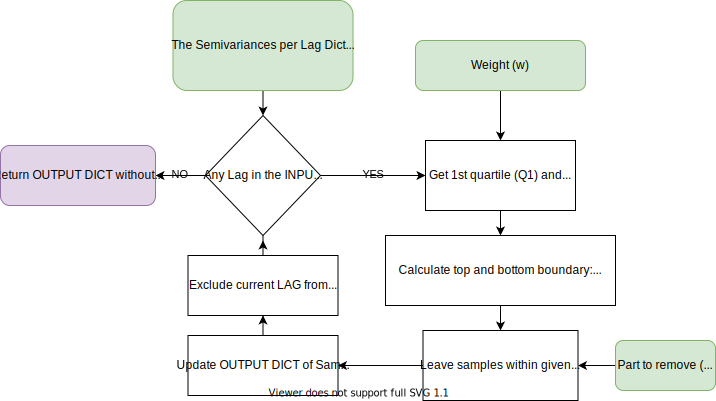

In [2]:
SVG('imgs/remove-outliers-algorithm.svg')

The `remove_outliers(data_dict, exclude_part='top', weight=1.5)` is the function which removes outliers from the variogram point cloud. It can remove outliers from the `top`, `bottom` or `both` parts of the variances within a specific lag. 

Function takes three input parameters:

- `data_dict` which is an `OrderedDict` of lags (keys) and semivariances (list of values),
- `exclude_part` is a `str` and it takes three possible values: `top` to remove outliers above the 3rd quartile, `bottom` to remove outliers below the 1st quartile and `both` to remove outliers from the bottom and the top section of variances,
- `weight` is a float. Parameter controls how many values are treated as outliers (see equations below).

**(1) Equation to decide if given value is an outlier - bottom:**

$$BottomOutliers < Q1 - weight*(Q3-Q1)$$


**(2) Equation to decide if given value is an outlier - top:**

$$Q3 + weight*(Q3-Q1) < TopOutliers$$

**(3) For `both` combine (1) and (2).**

where:

- Q1 - quartile 1 (25% of sorted samples),
- Q3 - auartile 3 (75% of sorted samples),
- weight - weight assigned to the algorithm. Larger weight => less number of outliers detected.

## Changelog:

- 2021-08-22: The first release of the article.

---